In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [16]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1162,22103,258111,32010,12.401641,35615,13.798327,28278,10.955752,32235,12.488813,...,15431,11.7,10.7,12.6,22926,3.0,2.8,3.2,5907,2
1852,36053,70795,6898,9.743626,9995,14.118229,9381,13.250936,7613,10.753584,...,4808,10.4,9.5,11.3,5951,2.9,2.7,3.1,1656,3
2886,51143,60949,5650,9.270045,7153,11.736042,6432,10.553085,6149,10.088763,...,5124,14.7,13.8,15.7,7288,3.9,3.7,4.2,1939,5
2987,53073,225685,24496,10.854067,27050,11.985732,40511,17.950240,28415,12.590558,...,11009,9.3,8.6,10.1,16961,2.8,2.6,3.0,5054,4
1595,29510,302838,34698,11.457611,29933,9.884162,53269,17.589933,50603,16.709594,...,19608,13.4,12.6,14.3,32940,3.3,3.1,3.5,8129,1
2060,39039,38165,4558,11.942880,5213,13.659112,4640,12.157736,4588,12.021486,...,2699,12.3,11.4,13.2,3618,3.0,2.8,3.3,894,5
1139,22057,98115,12684,12.927687,12565,12.806401,13073,13.324160,13145,13.397544,...,7727,13.2,12.2,14.1,9935,3.3,3.0,3.5,2450,4
732,18075,20764,2917,14.048353,2873,13.836448,2470,11.895589,2192,10.556733,...,1833,14.3,13.2,15.3,2209,3.5,3.2,3.8,539,6
1089,21197,12442,1659,13.333869,1611,12.948079,1496,12.023790,1552,12.473879,...,1251,15.3,14.0,16.4,1441,3.5,3.3,3.8,333,6
2256,42029,522046,60996,11.684028,72065,13.804339,62094,11.894354,63244,12.114641,...,22674,9.2,8.2,10.0,36979,2.6,2.4,2.8,10383,2


In [17]:
df_raw.to_csv('../data/raw/data_raw.csv')

In [50]:
df_processed = df_raw.copy()

In [51]:
list = df_processed.columns.to_list()
list[20:]

['White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of adults with less than a high school diploma 2014-18',
 'Percent of adults with a high school diploma only 2014-18',
 "Percent of adults completing some college or associate's degree 2014-18",
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'POVALL_2018',
 'PCTPOVALL_2018',
 'PCTPOV017_2018',
 'PCTPOV517_2018',
 'MED

In [52]:
# Feature selection (indpendent variables)

df_interin = df_processed[["0-9","19-Oct","20-29","30-39","40-49","50-59","60-69","70-79","80+","% White-alone","% Black-alone","% NA/AI-alone","% Asian-alone","% Hawaiian/PI-alone","Less than a high school diploma 2014-18","High school diploma only 2014-18","Bachelor's degree or higher 2014-18","MEDHHINC_2018","Employed_2018","Unemployed_2018","Active Physicians per 100000 Population 2018 (AAMC)","Obesity_prevalence","diabetes_prevalence","Heart disease_prevalence", "CKD_prevalence", "COPD_prevalence"]]

In [53]:
df_interin.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05
% White-alone,3140.0,84.494109,16.348987,3.841985,79.620473,91.410189,95.521727,9.904378e+01


In [54]:
X = df_interin.drop(["Heart disease_prevalence"], axis=1)
y = df_interin["Heart disease_prevalence"] # target variable (alwyas lowercase)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2115) #test_size is the percentage of data to be used for the test. rand0m_state = seed.

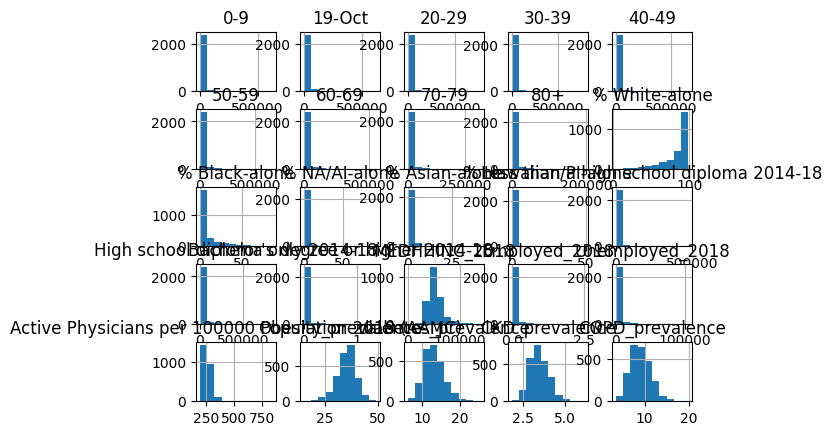

In [62]:
X_train.hist() # if the distributions are bell shaped then use STD Scaler
plt.show()

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Cross validation slices the dataset 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2119)

In [57]:
model = LassoCV(alphas=np.arange(0, 1, 0.05), cv=cv, n_jobs=-1)

In [65]:
model.fit(X_train_scaled, y_train)

/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.87666320284188, tolerance: 0.6748211079646016
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linear_regression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/

LassoCV(alphas=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=2119),
        n_jobs=-1)

In [66]:
model.alpha_

0.0

In [67]:
y_hat = model.predict(X_test_scaled)

In [68]:
print(f"MSE: {mean_squared_error(y_hat, y_test)}")
print(f"R2: {r2_score(y_test, y_hat)}")

MSE: 0.2138194083391021
R2: 0.936679047921832
